In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math
df=pd.read_csv('international_matches.csv')
df1=pd.read_csv('FIFA - 2022.csv')
df.T

,0,1,2,3,4,5,6,7,8,9,...,23911,23912,23913,23914,23915,23916,23917,23918,23919,23920
date,1993-08-08,1993-08-08,1993-08-08,1993-08-08,1993-08-08,1993-08-08,1993-08-08,1993-08-09,1993-08-11,1993-08-11,...,2022-06-14,2022-06-14,2022-06-14,2022-06-14,2022-06-14,2022-06-14,2022-06-14,2022-06-14,2022-06-14,2022-06-14
home_team,Bolivia,Brazil,Ecuador,Guinea,Paraguay,Peru,Zimbabwe,Guinea,Faroe Islands,Sweden,...,Ukraine,Bosnia and Herzegovina,Romania,Luxembourg,Turkey,Moldova,Liechtenstein,Chile,Japan,Korea Republic
away_team,Uruguay,Mexico,Venezuela,Sierra Leone,Argentina,Colombia,Eswatini,Sierra Leone,Norway,Switzerland,...,Republic of Ireland,Finland,Montenegro,Faroe Islands,Lithuania,Andorra,Latvia,Ghana,Tunisia,Egypt
home_team_continent,South America,South America,South America,Africa,South America,South America,Africa,Africa,Europe,Europe,...,Europe,Europe,Europe,Europe,Europe,Europe,Europe,South America,Asia,Asia
away_team_continent,South America,North America,South America,Africa,South America,South America,Africa,Africa,Europe,Europe,...,Europe,Europe,Europe,Europe,Europe,Europe,Europe,Africa,Africa,Africa
home_team_fifa_rank,59,8,35,65,67,70,50,65,111,4,...,27,59,48,94,43,180,192,28,23,29
away_team_fifa_rank,22,14,94,86,5,19,102,86,9,3,...,47,57,70,124,138,153,135,60,35,32
home_team_total_fifa_points,0,0,0,0,0,0,0,0,0,0,...,1535,1388,1446,1229,1461,932,895,1526,1553,1519
away_team_total_fifa_points,0,0,0,0,0,0,0,0,0,0,...,1449,1406,1342,1137,1092,1040,1105,1387,1499,1500
home_team_score,3,1,5,1,1,0,2,4,0,1,...,1,3,0,2,2,2,0,0,0,4


In [2]:
df['tournament'].unique()

array(['FIFA World Cup qualification', 'Friendly',
       'African Cup of Nations qualification', 'Amílcar Cabral Cup',
       'CFU Caribbean Cup qualification',
       'United Arab Emirates Friendship Tournament',
       'Malta International Tournament', 'Lunar New Year Cup',
       'African Cup of Nations', 'CFU Caribbean Cup',
       'UEFA Euro qualification', 'Kirin Cup', 'FIFA World Cup',
       'Oceania Nations Cup qualification', 'Baltic Cup', 'Gulf Cup',
       'Simba Tournament', 'CECAFA Cup', 'Confederations Cup',
       'Dynasty Cup', "King's Cup", 'Nehru Cup', 'SAFF Cup',
       'Copa Paz del Chaco', 'Korea Cup', 'USA Cup', 'Copa América',
       'Merdeka Tournament', 'South Pacific Games', 'UNCAF Cup',
       'Oceania Nations Cup', 'Windward Islands Tournament', 'Gold Cup',
       'AFC Asian Cup qualification', 'UEFA Euro', 'AFF Championship',
       'AFC Asian Cup', 'King Hassan II Tournament',
       'Cyprus International Tournament', 'Dunhill Cup',
       'COSAFA Cup qu

In [3]:
#df['tournament'] = df['tournament'].replace({'Friendly': 0, 'other_value': 1})
df['tournament'] = df['tournament'].apply(lambda x: 0 if x=='Friendly' else 1)
df['tournament']
df.head().T

,0,1,2,3,4
date,1993-08-08,1993-08-08,1993-08-08,1993-08-08,1993-08-08
home_team,Bolivia,Brazil,Ecuador,Guinea,Paraguay
away_team,Uruguay,Mexico,Venezuela,Sierra Leone,Argentina
home_team_continent,South America,South America,South America,Africa,South America
away_team_continent,South America,North America,South America,Africa,South America
home_team_fifa_rank,59,8,35,65,67
away_team_fifa_rank,22,14,94,86,5
home_team_total_fifa_points,0,0,0,0,0
away_team_total_fifa_points,0,0,0,0,0
home_team_score,3,1,5,1,1


# Describing the data

In [4]:
#df.head().T
df.describe().T

,count,mean,std,min,25%,50%,75%,max
home_team_fifa_rank,23921.0,77.854688,52.355225,1.0,33.0,71.0,115.0,211.0
away_team_fifa_rank,23921.0,80.797375,53.232902,1.0,36.0,73.0,119.0,211.0
home_team_total_fifa_points,23921.0,323.401488,500.825725,0.0,0.0,0.0,547.0,2164.0
away_team_total_fifa_points,23921.0,315.453576,490.944273,0.0,0.0,0.0,523.0,2164.0
home_team_score,23921.0,1.609214,1.630127,0.0,0.0,1.0,2.0,31.0
away_team_score,23921.0,1.068266,1.263944,0.0,0.0,1.0,2.0,21.0
tournament,23921.0,0.642239,0.479351,0.0,0.0,1.0,1.0,1.0
home_team_goalkeeper_score,8379.0,74.963838,8.212242,47.0,70.0,75.0,81.0,97.0
away_team_goalkeeper_score,8095.0,74.212477,8.225919,47.0,69.0,74.0,80.0,97.0
home_team_mean_defense_score,7787.0,74.903249,6.003114,52.8,71.0,75.2,78.8,91.8


1. Fifa countries

In [5]:
coll= df[['home_team']]
coll=df[['home_team']].rename(columns={'home_team':'team'})
ection=df[['away_team']]
ection=df[['away_team']].rename(columns={'away_team':'team'})

collection=coll.append(ection)
collection=collection[['team']].drop_duplicates()
collection=collection['team'].to_list()

wc_2022=df1['Team'].tolist()
# Replace "Iran" with "IR Iran"
wc_2022 = [team if team != 'Iran' else 'IR Iran' for team in wc_2022]
# Replace "South Korea" with "Korea Republic"
wc_2022 = [team if team != 'South Korea' else 'Korea Republic' for team in wc_2022]
# Replace "Croatia" with "croatia"
#wc_2022 = [team if team != 'Croatia' else 'croatia' for team in wc_2022]

print(wc_2022)

['Argentina', 'France', 'Croatia', 'Morocco', 'England', 'Netherlands', 'Portugal', 'Brazil', 'Japan', 'Senegal', 'Australia', 'Switzerland', 'USA', 'Spain', 'Poland', 'Korea Republic', 'Germany', 'Ecuador', 'Cameroon', 'Uruguay', 'Tunisia', 'Mexico', 'Belgium', 'Ghana', 'Saudi Arabia', 'IR Iran', 'Costa Rica', 'Denmark', 'Serbia', 'Wales', 'Canada', 'Qatar']


C:\Users\Sukanta Bhunia\AppData\Local\Temp\ipykernel_24420\1977844416.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  collection=coll.append(ection)


2. Fifa rankings

In [6]:
home=df[['date','home_team','home_team_fifa_rank','home_team_total_fifa_points','home_team_score']]
away=df[['date','away_team','away_team_fifa_rank','away_team_total_fifa_points','away_team_score']]
home=home.rename(columns={'home_team':'team','home_team_fifa_rank':'rank','home_team_total_fifa_points':'total fifa points','home_team_score':'team_score'})
away=away.rename(columns={'away_team':'team','away_team_fifa_rank':'rank','away_team_total_fifa_points':'total fifa points','away_team_score':'team_score'})
fifarank=home.append(away)

fifarank=fifarank.sort_values(['team','date'],ascending=[True,False])
fifarank['row_number']=fifarank.groupby('team').cumcount()+1
fifatop=fifarank[fifarank['row_number']==1].drop('row_number',axis=1).nsmallest(10,'rank')
fifatop[['team','rank','total fifa points']]

C:\Users\Sukanta Bhunia\AppData\Local\Temp\ipykernel_24420\1032665697.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fifarank=home.append(away)


,team,rank,total fifa points
23760,Brazil,1,1832
23909,Belgium,2,1827
23885,France,3,1789
23741,Argentina,4,1765
23906,England,5,1761
23907,Italy,6,1723
23866,Spain,7,1709
23867,Portugal,8,1674
23903,Mexico,9,1658
23908,Netherlands,10,1658


3. Advantage over home matches

In [7]:
hometeam=df[['country','home_team_score','away_team_score']]
#home_team['home_team_score']>home_team['away_team_score']
home_wins=hometeam.loc[hometeam['home_team_score']>hometeam['away_team_score']]

home_wins=home_wins.rename(columns={'home_team_score':'goals_scored','away_team_score':'goals_conceded'})
home_wins

home_loss=hometeam.loc[hometeam['home_team_score']<hometeam['away_team_score']]
home_loss=home_loss.rename(columns={'home_team_score':'goals_scored','away_team_score':'goals_conceded'})
home_loss

home_advantage=home_wins.append(home_loss)
home_advantage

x=home_advantage.mean()
print(x)

goals_scored      1.854837
goals_conceded    1.144394
dtype: float64


C:\Users\Sukanta Bhunia\AppData\Local\Temp\ipykernel_24420\2781291216.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  home_advantage=home_wins.append(home_loss)
C:\Users\Sukanta Bhunia\AppData\Local\Temp\ipykernel_24420\2781291216.py:15: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  x=home_advantage.mean()


4. Piechart of homeadvantage

C:\Users\Sukanta Bhunia\AppData\Local\Temp\ipykernel_24420\1442176457.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  x = home_advantage.mean()


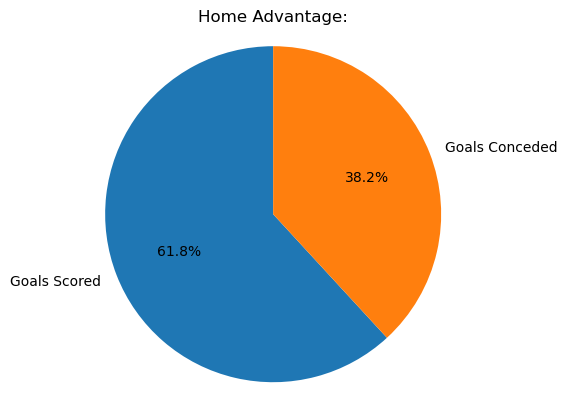

In [8]:
# Calculate the mean goals scored and conceded
x = home_advantage.mean()
labels = ['Goals Scored', 'Goals Conceded']
sizes = [x['goals_scored'], x['goals_conceded']]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title("Home Advantage:")
plt.show()

# Analysing the data (logical factor based)

1. Most wins

In [139]:
hometeam=df[['date','home_team','home_team_score','away_team_score']]

In [140]:
home_wins=hometeam.loc[hometeam['home_team_score']>hometeam['away_team_score']]
home_loss=hometeam.loc[hometeam['home_team_score']<hometeam['away_team_score']]
hometeam_wins=home_wins[['date','home_team','home_team_score','away_team_score']].rename(columns={'home_team':'team','home_team_score':'Home_team_win','away_team_score':'away_team_win'})
awayteam_wins=home_loss[['date','home_team','home_team_score','away_team_score']].rename(columns={'home_team':'team','home_team_score':'Home_team_win','away_team_score':'away_team_win'})

Team_streak=hometeam_wins.append(awayteam_wins)
Team_streak

Team_streak['team'].value_counts().nlargest(10)

C:\Users\Sukanta Bhunia\AppData\Local\Temp\ipykernel_24420\4192234556.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Team_streak=hometeam_wins.append(awayteam_wins)


USA                     253
Mexico                  243
Saudi Arabia            219
Japan                   211
Brazil                  195
Egypt                   195
Qatar                   187
Korea Republic          186
United Arab Emirates    182
Oman                    179
Name: team, dtype: int64

2. Most loss

In [141]:
hometeam_loss=home_loss[['date','home_team','home_team_score','away_team_score']].rename(columns={'home_team':'team','home_team_score':'Home_team_win','away_team_score':'away_team_win'})
awayteam_loss=home_loss[['date','home_team','home_team_score','away_team_score']].rename(columns={'home_team':'team','home_team_score':'Home_team_win','away_team_score':'away_team_win'})

Team_streak=hometeam_loss.append(awayteam_loss)
Team_streak

Team_streak['team'].value_counts().nlargest(10)

C:\Users\Sukanta Bhunia\AppData\Local\Temp\ipykernel_24420\4026324686.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Team_streak=hometeam_loss.append(awayteam_loss)


Malta                   190
Luxembourg              190
San Marino              166
Estonia                 156
Andorra                 146
Liechtenstein           146
Latvia                  128
Qatar                   128
El Salvador             128
United Arab Emirates    126
Name: team, dtype: int64

3(a). Winning % when higher rank team faces lower rank team 

   (rank based analysation)

In [142]:
def victory(team1,team2,team1_rank,team2_rank,team1_score,team2_score):
    if team1_score > team2_score:
        winner = team1
    elif team1_score == team2_score:
        winner = 'Drawn'
    else:
        winner = team2
    return winner 

#winner counts
df['winner']=df.apply(lambda x: victory(x['home_team'],x['away_team'],x['home_team_fifa_rank'],x['away_team_fifa_rank'],x['home_team_score'],x['away_team_score']),axis=1)


In [143]:
def rank(home,away,rank_home,rank_away):
    if rank_home<rank_away:
        return home
    else:
        return away  

#better rank counts    
df['better_rank']=df.apply(lambda x:rank(x['home_team'],x['away_team'],x['home_team_fifa_rank'],x['away_team_fifa_rank']),axis=1)
    

In [144]:
def result_rank(winner,better_rank):
    if winner =='Drawn':
        return winner
    if winner == better_rank:
        return 'Highest'
    else:
        return 'Smallest'

#counts of the result better rank & winner    
df['result_rank']=df.apply(lambda x: result_rank(x['winner'],x['better_rank']),axis=1)    

3(b). Countplot for result rank

<function matplotlib.pyplot.show(close=None, block=None)>

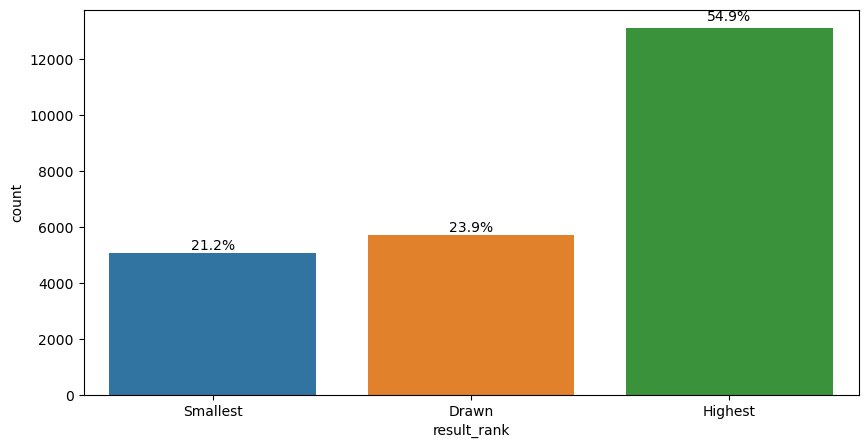

In [145]:
plt.figure(figsize=(10,5))
total=float(len(df))
ax=sns.countplot(x='result_rank',data=df)
for p in ax.patches:
    percentage='{:.1f}%'.format(100*p.get_height()/total)
    width=p.get_width()
    height=p.get_height()
    x,y=p.get_xy()
    ax.annotate(percentage,(x+width/2,y+height*1.02),ha='center')
plt.show    

4(a). winning % when heigher offense rank team faces lower offense rank team

   (rank based analysis)

In [146]:
#attack score home team
df_rank_attack=df[df['home_team_mean_offense_score'].notnull()]
#attack score away team
df_rank_attack=df[df['away_team_mean_offense_score'].notnull()]

def rank_attack(home,away,rank_home,rank_away):
    if rank_home>rank_away:
        return home
    else:
        return away

#storing teams with better attack score    
df_rank_attack['better_attack']=df.apply(lambda x:rank_attack(x['home_team'],x['away_team'],x['home_team_mean_offense_score'],x['away_team_mean_offense_score']),axis=1)
#storing teams with better result only attack based
df_rank_attack['result_attack']=df_rank_attack.apply(lambda x:result_rank(x['winner'],x['better_attack']),axis=1)    

4(b). countplot for attack rank 

   (based on attack conclusion (i.e.attack score + attack result )

<function matplotlib.pyplot.show(close=None, block=None)>

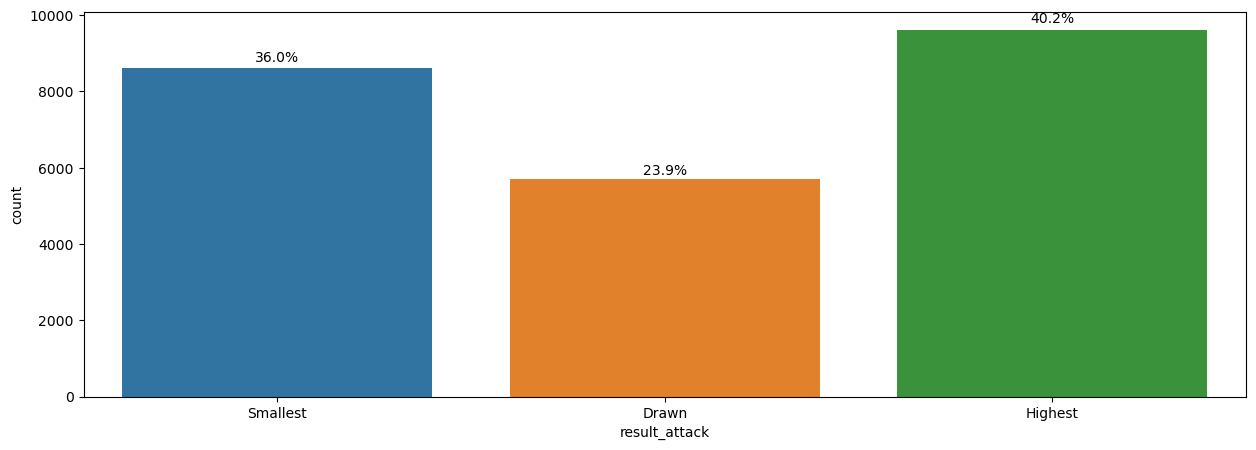

In [147]:
plt.figure(figsize=(15,5))
total=float(len(df_rank_attack))
ax=sns.countplot(x='result_attack',data=df_rank_attack)
for p in ax.patches:
    percentage='{:.1f}%'.format(100*p.get_height()/total)
    width=p.get_width()
    height=p.get_height()
    x,y=p.get_xy()
    ax.annotate(percentage,(x+width/2,y+height*1.02),ha='center')
plt.show    

5(a). Result whether strong attack team score more & team with strong defence cociede less

In [148]:
#calculating offence score of all teams
#(priority based on offence score)
offense_score=[]

for x in wc_2022:
    of_score=np.round(df[df['home_team']==x]['home_team_mean_offense_score'].mean()+df[df['away_team']==x]['away_team_mean_offense_score'].mean()/2)
    offense_score.append(of_score)
offense_score=pd.DataFrame({'Team':wc_2022,'Offense Score':offense_score}).sort_values('Offense Score',ascending=False).reset_index(drop=True)
offense_score.index +=1
offense_score


#calculating goal difference(GD), goal ratio(GR) of all teams
#(prioriy based on the overall GD,GR scores)
goals_scored_home, goals_scored_away = [], []
goals_conceded_home, goals_conceded_away = [], []
total_goals_scored, total_goals_conceded = [], []

for team in wc_2022:
    gch = df[df['home_team'] == team]['away_team_score'].sum()
    gsh = df[df['home_team'] == team]['home_team_score'].sum()
    gca = df[df['away_team'] == team]['home_team_score'].sum()
    gsa = df[df['away_team'] == team]['away_team_score'].sum()

    tgc = gch + gca
    tgs = gsh + gsa

    goals_conceded_home.append(gch)
    goals_scored_home.append(gsh)
    goals_conceded_away.append(gca)
    goals_scored_away.append(gsa)

    total_goals_scored.append(tgs)
    total_goals_conceded.append(tgc)

goals = pd.DataFrame({
    'Team': wc_2022,
    'Scored goals home': goals_scored_home,
    'Scored goals away': goals_scored_away,
    'Conceded goals home': goals_conceded_home,
    'Conceded goals away': goals_conceded_away,
    'Total scored goals': total_goals_scored,
    'Total conceded goals': total_goals_conceded
})

goals['Goal difference'] = goals['Total scored goals'] - goals['Total conceded goals']
goals['Goal ratio'] = goals['Total scored goals'] / goals['Total conceded goals']

goals = goals.sort_values('Goal difference', ascending=False).reset_index(drop=True)
goals.index += 1

goals


#comparing both offense score vs GD,GR and storing based on priority of both scores
#it is comparing values if a higher offence team scores more goals against other teams
offense_players_vs_goals_scored = offense_score.merge(goals, on='Team')[['Team', 'Offense Score', 'Total scored goals']]
offense_players_vs_goals_scored['Total scored goals/offense score'] = offense_players_vs_goals_scored['Total scored goals'] / offense_players_vs_goals_scored['Offense Score']
offense_players_vs_goals_scored = offense_players_vs_goals_scored.sort_values('Total scored goals/offense score')
offense_players_vs_goals_scored.index += 1
offense_players_vs_goals_scored=offense_players_vs_goals_scored.sort_index(ascending=True)
offense_players_vs_goals_scored

,Team,Offense Score,Total scored goals,Total scored goals/offense score
1,Serbia,117.0,267,2.282051
2,Spain,86.0,781,9.081395
3,Portugal,85.0,668,7.858824
4,Argentina,84.0,657,7.821429
5,England,82.0,630,7.682927
6,Netherlands,82.0,700,8.536585
7,France,82.0,670,8.170732
8,Belgium,80.0,563,7.037500
9,Wales,79.0,273,3.455696
10,Germany,79.0,875,11.075949


5(b). plotting 

Text(0.5, 1.0, 'top 10 best team goals/offence ratio')

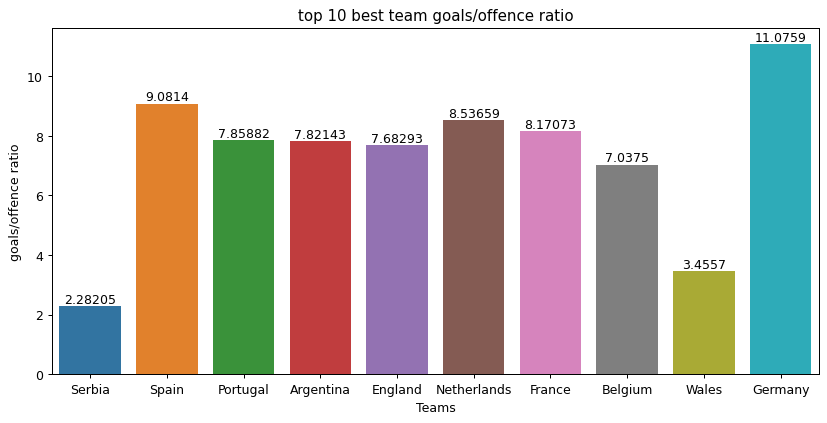

In [149]:
plt.figure(figsize=(11,5),dpi=90)
ax=sns.barplot(data=offense_players_vs_goals_scored[:10],x='Team',y='Total scored goals/offense score')
ax.bar_label(ax.containers[0])
plt.xlabel('Teams')
plt.ylabel('goals/offence ratio')
plt.title('top 10 best team goals/offence ratio')

6(a). better team win percentage in home team, away team

In [150]:
home_team_better_rank=df[(df['home_team_fifa_rank']<df['away_team_fifa_rank'])]['home_team_result'].value_counts()
home_team_better_rank

away_team_better_rank=df[(df['home_team_fifa_rank']>df['away_team_fifa_rank'])]['home_team_result'].value_counts()
away_team_better_rank

# Calculate win percentages
away_team_better_rank_wins_percent = np.round(100 * away_team_better_rank['Win'] / away_team_better_rank.sum())
home_team_better_rank_wins_percent = np.round(100 * home_team_better_rank['Win'] / home_team_better_rank.sum())
total_team_better_rank_win_percent = np.round(100 * (away_team_better_rank['Win'] + home_team_better_rank['Win']) / (away_team_better_rank.sum() + home_team_better_rank.sum()))

data = {'win percentage': [home_team_better_rank_wins_percent, away_team_better_rank_wins_percent, total_team_better_rank_win_percent]}
better_team_win_percent = pd.DataFrame(data, index=['home', 'away', 'total'])
better_team_win_percent

,win percentage
home,66.0
away,30.0
total,49.0


6(b). plotting 

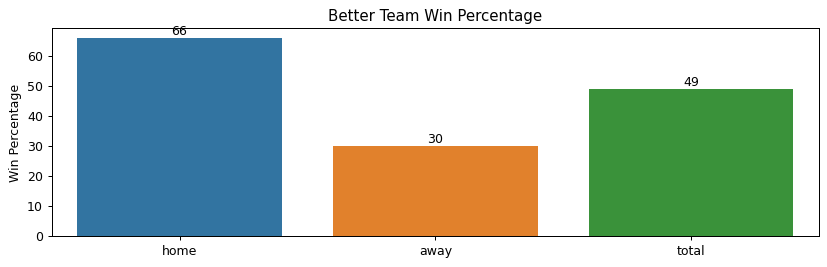

In [151]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(11, 3), dpi=90)
ax = sns.barplot(data=better_team_win_percent, x=better_team_win_percent.index, y='win percentage')  # Correct column name
sns.barplot(data=better_team_win_percent, x=better_team_win_percent.index, y='win percentage')  # Correct column name
ax.bar_label(ax.containers[0], label_type='edge')  # Label the bars on the top edge
plt.ylabel('Win Percentage')
plt.title('Better Team Win Percentage')
plt.show()

# Analysing the data (statistical factor based)

1. teams with best defense, midfield, offense and gk

In [152]:
df['home_team_mean_midfield_score'].fillna(0, inplace=True)
df['away_team_mean_midfield_score'].fillna(0, inplace=True)

df['home_team_mean_offense_score'].fillna(0, inplace=True)
df['away_team_mean_offense_score'].fillna(0, inplace=True)

df['home_team_mean_defense_score'].fillna(0, inplace=True)
df['away_team_mean_defense_score'].fillna(0, inplace=True)

df['home_team_goalkeeper_score'].fillna(0, inplace=True)
df['away_team_goalkeeper_score'].fillna(0, inplace=True)

In [153]:
ranks = []
for x in wc_2022:
    rank_df = df[(df['home_team'] == x) | (df['away_team'] == x)].sort_values(['date', 'home_team_fifa_rank', 'away_team_fifa_rank'])
    if (rank_df['home_team'] == x).any():
        rank = rank_df.loc[rank_df['home_team'] == x, 'home_team_fifa_rank'].values[0]
    elif (rank_df['away_team'] == x).any():
        rank = rank_df.loc[rank_df['away_team'] == x, 'away_team_fifa_rank'].values[0]
    else:
        rank = None
    ranks.append(rank)

team_ranks = pd.DataFrame({'Team': wc_2022, 'Rank': ranks}).sort_values('Rank').reset_index(drop=True)
team_ranks['Rank'] = team_ranks.index + 1  # Assign consecutive integer ranks
team_ranks

,Team,Rank
0,Argentina,1
1,Germany,2
2,France,3
3,Brazil,4
4,Denmark,5
5,England,6
6,Netherlands,7
7,Spain,8
8,Switzerland,9
9,Mexico,10


1(a). teams with best gk

In [154]:
goalkeeper_scores = []

for x in wc_2022:
    avg_gk_score = (df[df['away_team'] == x]['away_team_goalkeeper_score'].mean() + df[df['home_team'] == x]['home_team_goalkeeper_score'].mean()) / 2
    gk_score = np.round(avg_gk_score)
    gk_score = goalkeeper_scores.append(gk_score)
    
goalkeeper_scores = pd.DataFrame({'Team': wc_2022, 'GK score': goalkeeper_scores}).sort_values('GK score', ascending=False).reset_index(drop=True)
goalkeeper_scores.index += 1  # Assign consecutive integer ranks
goalkeeper_scores

,Team,GK score
1,Serbia,76.0
2,Spain,60.0
3,Germany,55.0
4,Portugal,55.0
5,France,55.0
6,England,54.0
7,Netherlands,54.0
8,Belgium,53.0
9,Wales,52.0
10,Poland,52.0


plotting gk based

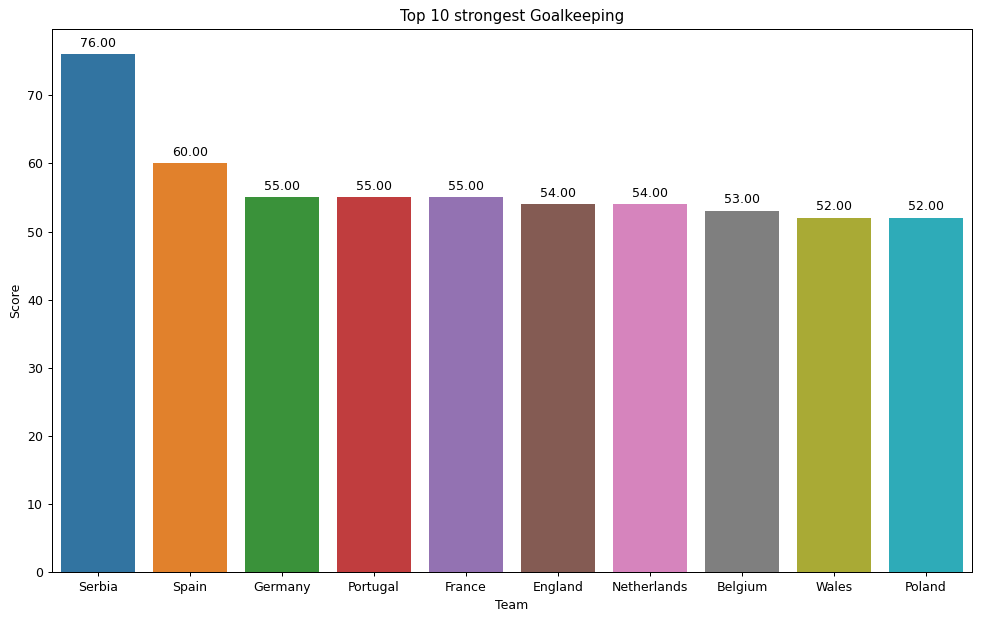

In [155]:
plt.figure(figsize=(11, 7), dpi=90)
ax = sns.barplot(data=goalkeeper_scores[:10], x='Team', y='GK score')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 9), 
                textcoords='offset points')

plt.xlabel('Team')
plt.ylabel('Score')
plt.title('Top 10 strongest Goalkeeping')
plt.tight_layout()
plt.show()


1(b). teams with best defense 

In [156]:
defense_scores = []

for x in wc_2022:
    df_score = (df[df['home_team'] == x]['home_team_mean_defense_score'].mean() + df[df['away_team'] == x]['away_team_mean_defense_score'].mean()) / 2
    df_score = np.round(df_score)
    defense_scores.append(df_score)
    
defense_scores_df = pd.DataFrame({'Team': wc_2022, 'Defense Score': defense_scores}).sort_values('Defense Score', ascending=False).reset_index(drop=True)
defense_scores_df.index += 1  # Assign consecutive integer ranks
defense_scores_df

,Team,Defense Score
1,Serbia,80.0
2,Spain,57.0
3,Portugal,56.0
4,England,55.0
5,Wales,53.0
6,Belgium,53.0
7,France,53.0
8,Argentina,52.0
9,Germany,52.0
10,Netherlands,52.0


plotting defense

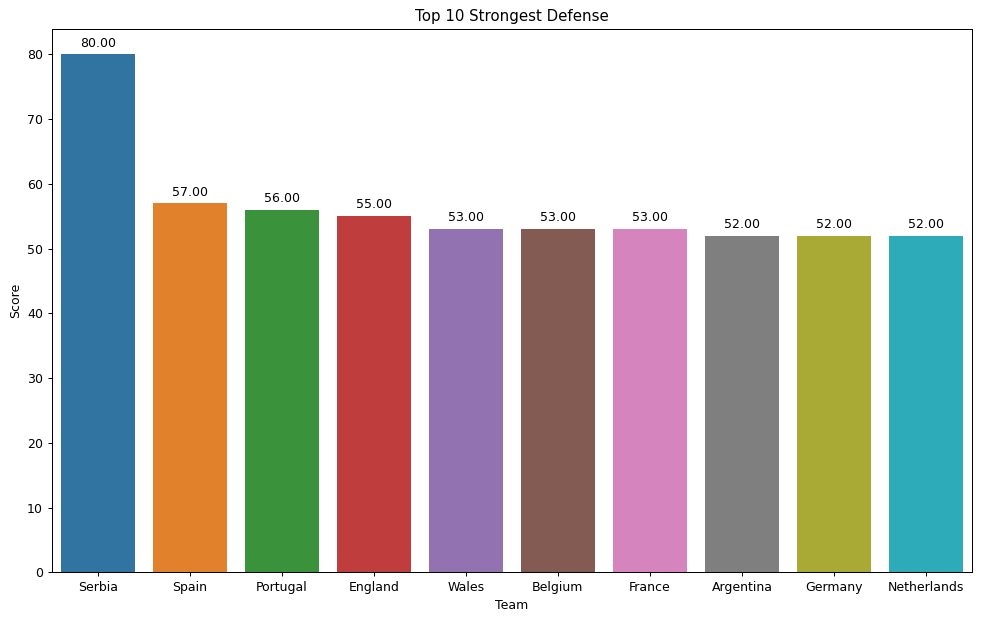

In [157]:
plt.figure(figsize=(11, 7), dpi=90)
ax = sns.barplot(data=defense_scores_df[:10], x='Team', y='Defense Score')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 9), 
                textcoords='offset points')

plt.xlabel('Team')
plt.ylabel('Score')
plt.title('Top 10 Strongest Defense')
plt.tight_layout()
plt.show()

1(c). teams with best offense 

In [158]:
attack_scores = []

for x in wc_2022:
    attack_score = (df[df['home_team'] == x]['home_team_mean_offense_score'].mean() + df[df['away_team'] == x]['away_team_mean_offense_score'].mean()) / 2
    attack_score = np.round(attack_score)
    attack_scores.append(attack_score)
    
attack_scores_df = pd.DataFrame({'Team': wc_2022, 'Attack Score': attack_scores}).sort_values('Attack Score', ascending=False).reset_index(drop=True)
attack_scores_df.index += 1  # Assign consecutive integer ranks
attack_scores_df

,Team,Attack Score
1,Serbia,78.0
2,Spain,58.0
3,Portugal,57.0
4,Argentina,56.0
5,England,55.0
6,Netherlands,55.0
7,France,54.0
8,Belgium,53.0
9,Uruguay,53.0
10,Croatia,52.0


plotting offense

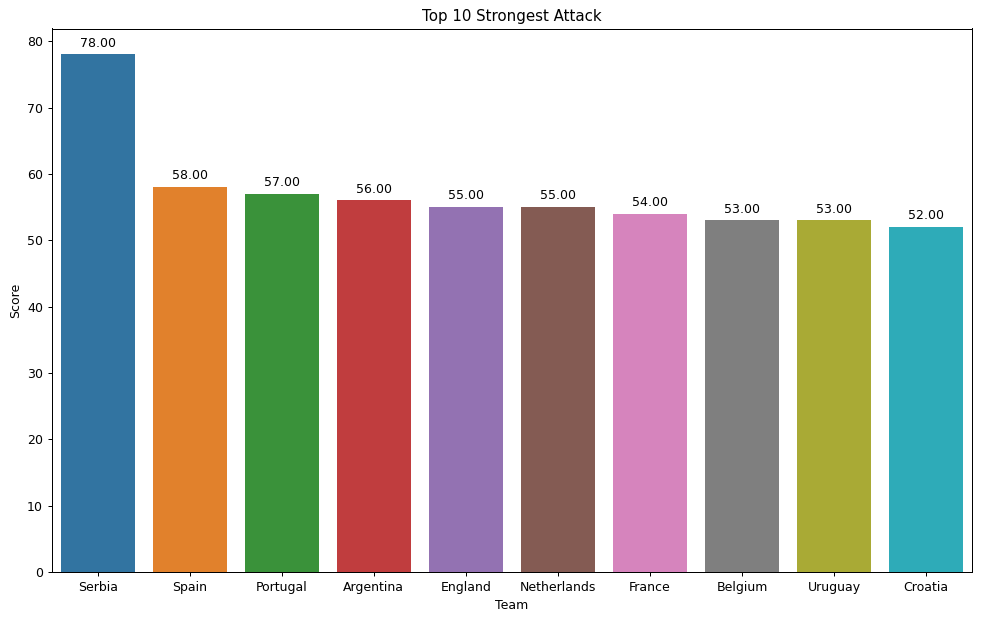

In [159]:
plt.figure(figsize=(11, 7), dpi=90)
ax = sns.barplot(data=attack_scores_df[:10], x='Team', y='Attack Score')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 9), 
                textcoords='offset points')

plt.xlabel('Team')
plt.ylabel('Score')
plt.title('Top 10 Strongest Attack')
plt.tight_layout()
plt.show()

1(d). teams with best midfield

In [160]:
midfield_scores = []

for x in wc_2022:
    midfield_score = (df[df['home_team'] == x]['home_team_mean_midfield_score'].mean() + df[df['away_team'] == x]['away_team_mean_midfield_score'].mean()) / 2
    midfield_score = np.round(midfield_score)
    midfield_scores.append(midfield_score)
    
midfield_scores_df = pd.DataFrame({'Team': wc_2022, 'Midfield Score': midfield_scores}).sort_values('Midfield Score', ascending=False).reset_index(drop=True)
midfield_scores_df.index += 1  # Assign consecutive integer ranks
midfield_scores_df
#midfield_scores

,Team,Midfield Score
1,Serbia,80.0
2,Spain,58.0
3,Portugal,56.0
4,Wales,55.0
5,England,55.0
6,France,55.0
7,Netherlands,54.0
8,Argentina,53.0
9,Belgium,53.0
10,Germany,53.0


plotting midfield

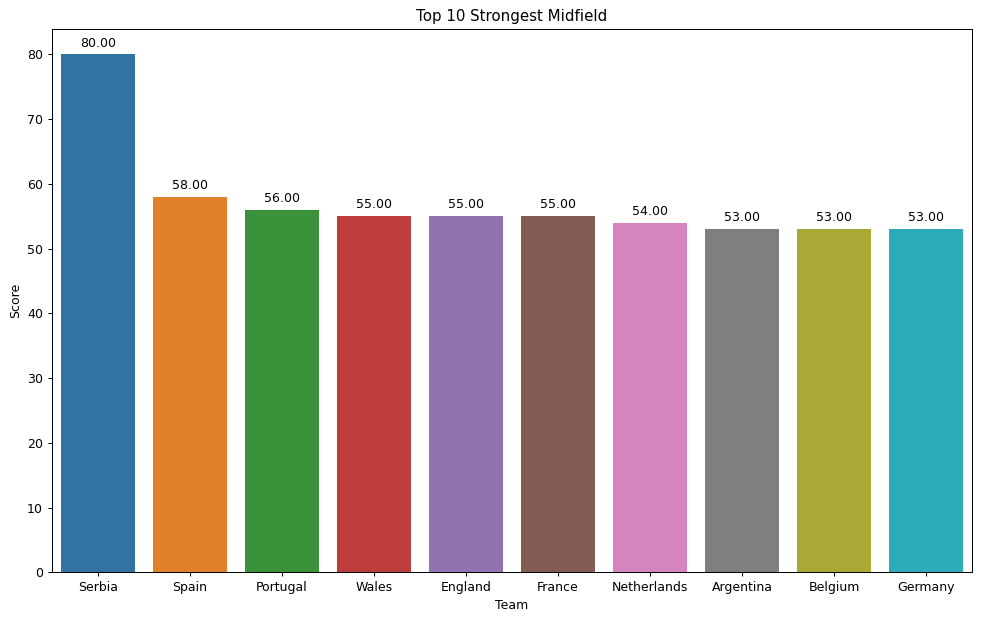

In [161]:
plt.figure(figsize=(11, 7), dpi=90)
ax = sns.barplot(data=midfield_scores_df[:10], x='Team', y='Midfield Score')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 9), 
                textcoords='offset points')

plt.xlabel('Team')
plt.ylabel('Score')
plt.title('Top 10 Strongest Midfield')  # Adjust the title for midfield
plt.tight_layout()
plt.show()

2. Win percentage

In [162]:
hwins, hdraws, hloses = [], [], []
awins, adraws, aloses = [], [], []
#goalkeeper_sc,defense_sc,attack_sc,midfield_sc = [],[],[],[]

for team in wc_2022:
    home_win = df[df["home_team"] == team][df["home_team_result"] == "Win"].shape[0]
    home_draw = df[df["home_team"] == team][df["home_team_result"] == "Draw"].shape[0]
    home_lose = df[df["home_team"] == team][df["home_team_result"] == "Lose"].shape[0]
    
    away_win = df[df["away_team"] == team][df["home_team_result"] == "Lose"].shape[0]
    away_draw = df[df["away_team"] == team][df["home_team_result"] == "Draw"].shape[0]
    away_lose = df[df["away_team"] == team][df["home_team_result"] == "Win"].shape[0]
    
    hwins.append(home_win)
    hdraws.append(home_draw)
    hloses.append(home_lose)
    
    awins.append(away_win)
    adraws.append(away_draw)
    aloses.append(away_lose)
    
    wins = np.add(hwins, awins)
    draws = np.add(hdraws, adraws)
    loses = np.add(hloses, aloses)

C:\Users\Sukanta Bhunia\AppData\Local\Temp\ipykernel_24420\3207659769.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  home_win = df[df["home_team"] == team][df["home_team_result"] == "Win"].shape[0]
C:\Users\Sukanta Bhunia\AppData\Local\Temp\ipykernel_24420\3207659769.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  home_draw = df[df["home_team"] == team][df["home_team_result"] == "Draw"].shape[0]
C:\Users\Sukanta Bhunia\AppData\Local\Temp\ipykernel_24420\3207659769.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  home_lose = df[df["home_team"] == team][df["home_team_result"] == "Lose"].shape[0]
C:\Users\Sukanta Bhunia\AppData\Local\Temp\ipykernel_24420\3207659769.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  away_win = df[df["away_team"] == team][df["home_team_result"] == "Lose"].shape[0]
C:\Users\Sukanta Bhunia\AppData\Local\Temp\ipykernel_2

In [163]:
win_draw_lose = pd.DataFrame({'Team': wc_2022, 'Win': wins, 'Draw': draws, 'Lose': loses,
                              'Home win': hwins, 'Home draw': hdraws,
                              'Home lose': hloses, 'Away win': awins, 'Away draw': adraws, 'Away lose': aloses})

win_draw_lose.insert(1, 'Total', win_draw_lose['Win']+win_draw_lose ['Draw']+win_draw_lose['Lose'])
win_draw_lose.insert(8, 'Total Home',win_draw_lose['Home win']+win_draw_lose['Home draw']+ win_draw_lose['Home lose'])
win_draw_lose.insert(12, 'Total Away', win_draw_lose['Away win']+win_draw_lose ['Away draw']+win_draw_lose['Away lose'])

win_draw_lose['Win %'] = np.around (100*win_draw_lose['Win']/win_draw_lose[ 'Total'], 2)
win_draw_lose['Draw %'] = np.round(100*win_draw_lose['Draw']/win_draw_lose['Total'], 2)
win_draw_lose['Lose %'] = np.round(100*win_draw_lose['Lose']/win_draw_lose['Total'], 2)
                     
win_draw_lose['Home Win %'] = np.round(100*win_draw_lose['Home win']/win_draw_lose [ 'Total Home'], 2) 
win_draw_lose['Home Draw %'] = np.round(100*win_draw_lose['Home draw']/win_draw_lose['Total Home'], 2)
win_draw_lose['Home Lose %'] = np.round(100*win_draw_lose['Home lose']/win_draw_lose['Total Home'], 2) 
                     
win_draw_lose['Away Win %'] = np.round(100*win_draw_lose['Away win']/win_draw_lose['Total Away'], 2) 
win_draw_lose['Away Draw %'] = np.round(100*win_draw_lose['Away draw']/win_draw_lose['Total Away'], 2)
win_draw_lose['Away Lose %'] = np.round(100*win_draw_lose['Away lose']/win_draw_lose[ 'Total Away'], 2)

win_draw_lose.index+=1
win_draw_lose.style.set_properties(**{'background-color':'green','color':'white'},subset=['Home win','Home Win %','Win %'])

,Team,Total,Win,Draw,Lose,Home win,Home draw,Home lose,Total Home,Away win,Away draw,Away lose,Total Away,Win %,Draw %,Lose %,Home Win %,Home Draw %,Home Lose %,Away Win %,Away Draw %,Away Lose %
1,Argentina,367,216,79,72,130,36,24,190,86,43,48,177,58.860000,21.530000,19.620000,68.420000,18.950000,12.630000,48.590000,24.290000,27.120000
2,France,370,230,83,57,145,44,32,221,85,39,25,149,62.160000,22.430000,15.410000,65.610000,19.910000,14.480000,57.050000,26.170000,16.780000
3,Croatia,320,172,79,69,92,38,24,154,80,41,45,166,53.750000,24.690000,21.560000,59.740000,24.680000,15.580000,48.190000,24.700000,27.110000
4,Morocco,323,169,81,73,124,34,35,193,45,47,38,130,52.320000,25.080000,22.600000,64.250000,17.620000,18.130000,34.620000,36.150000,29.230000
5,England,334,196,75,63,124,38,32,194,72,37,31,140,58.680000,22.460000,18.860000,63.920000,19.590000,16.490000,51.430000,26.430000,22.140000
6,Netherlands,340,201,74,65,119,40,33,192,82,34,32,148,59.120000,21.760000,19.120000,61.980000,20.830000,17.190000,55.410000,22.970000,21.620000
7,Portugal,336,198,79,59,123,37,24,184,75,42,35,152,58.930000,23.510000,17.560000,66.850000,20.110000,13.040000,49.340000,27.630000,23.030000
8,Brazil,433,301,76,56,181,31,21,233,120,45,35,200,69.520000,17.550000,12.930000,77.680000,13.300000,9.010000,60.000000,22.500000,17.500000
9,Japan,425,227,89,109,154,63,63,280,73,26,46,145,53.410000,20.940000,25.650000,55.000000,22.500000,22.500000,50.340000,17.930000,31.720000
10,Senegal,325,156,89,80,98,35,17,150,58,54,63,175,48.000000,27.380000,24.620000,65.330000,23.330000,11.330000,33.140000,30.860000,36.000000


In [164]:
win_draw_lose=win_draw_lose.sort_values(by='Win %',ascending=False)

Text(0.5, 1.0, 'top 10 teams with highest winning % till 2022')

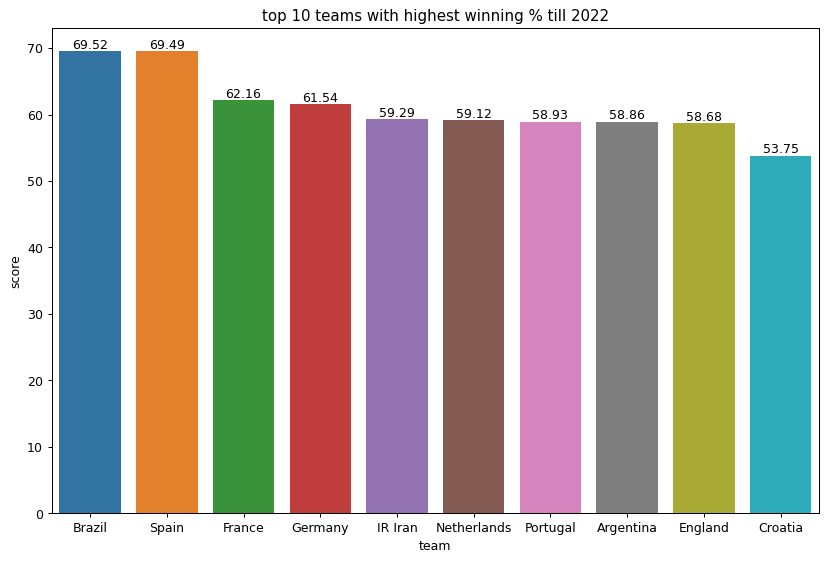

In [165]:
plt.figure(figsize=(11,7),dpi=90)
ax=sns.barplot(data=win_draw_lose[:10],x='Team',y='Win %')
ax.bar_label(ax.containers[0])
plt.xlabel('team')
plt.ylabel('score')
plt.title("top 10 teams with highest winning % till 2022")

In [166]:
american_teams=["USA", "Mexico", "Costa Rica", "Canada", "Qatar"]
american_df = win_draw_lose[win_draw_lose["Team"].isin(american_teams)]
non_american_df = win_draw_lose[~win_draw_lose["Team"].isin(american_teams)]

american_df["Net Win %"] = (american_df["Win %"] + american_df["Home Win %"]) / 2
non_american_df["Net Win %"] = (non_american_df["Win %"] + non_american_df["Home Win %"]) / 2


final_df = pd.concat([american_df, non_american_df])
final_df.style.set_properties(**{'background-color':'green','color':'white'},subset=['Home win','Win %','Net Win %'])
final_df = final_df.replace('Korea Republic','South Korea')

C:\Users\Sukanta Bhunia\AppData\Local\Temp\ipykernel_24420\819005998.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  american_df["Net Win %"] = (american_df["Win %"] + american_df["Home Win %"]) / 2
C:\Users\Sukanta Bhunia\AppData\Local\Temp\ipykernel_24420\819005998.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_american_df["Net Win %"] = (non_american_df["Win %"] + non_american_df["Home Win %"]) / 2


In [167]:
final_df = final_df.replace('IR Iran','Iran')
print(final_df['Net Win %'])

22    56.370
13    56.970
32    46.950
27    46.945
31    45.045
8     73.600
14    73.105
2     63.885
17    62.505
26    64.460
6     60.550
7     62.890
1     63.640
5     61.300
3     56.745
9     54.205
23    56.345
11    59.520
4     58.285
28    53.610
25    55.410
16    52.995
21    54.725
10    56.665
20    52.980
12    48.715
15    47.970
19    52.225
29    47.805
24    52.285
18    47.380
30    38.955
Name: Net Win %, dtype: float64


In [168]:
final_df=final_df.sort_values(by='Net Win %',ascending=False)

Text(0.5, 1.0, 'top 10 teams with highest winning %')

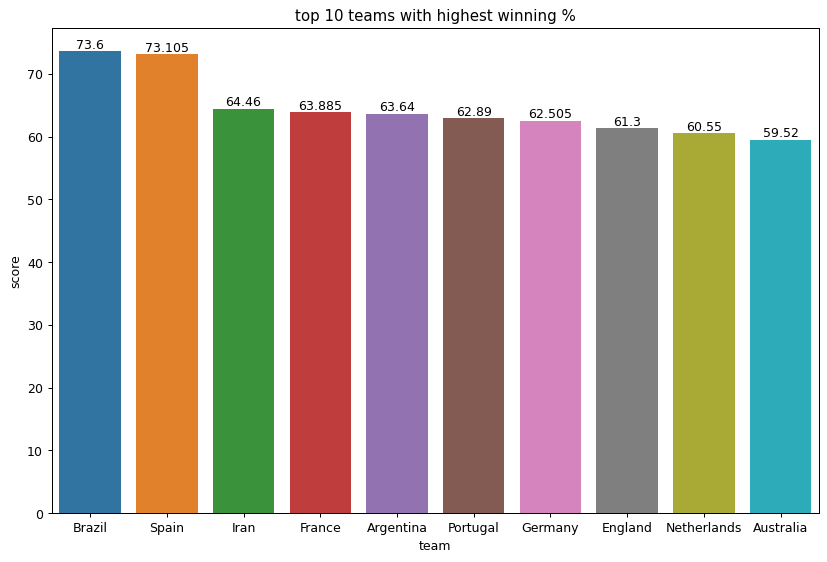

In [169]:
plt.figure(figsize=(11,7),dpi=90)
ax=sns.barplot(data=final_df[:10],x='Team',y='Net Win %')
ax.bar_label(ax.containers[0])
plt.xlabel('team')
plt.ylabel('score')
plt.title("top 10 teams with highest winning %")

In [170]:
df['rank_difference']=df['home_team_fifa_rank']-df['away_team_fifa_rank']
df['average_rank']=(df['home_team_fifa_rank']+df['away_team_fifa_rank']/2)
df['point_difference']=df['home_team_total_fifa_points']-df['away_team_total_fifa_points']
df['score_difference']=df['home_team_score']-df['away_team_score']
df['total_fifa_points']=df['home_team_total_fifa_points']

In [171]:
df['is_won']=df['score_difference']>0
df['is_stake']=df['tournament']!='Friendly'

In [172]:
from sklearn import linear_model
from sklearn import ensemble
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

D:\coding\python\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Text(0.5, 1.0, 'AUC score is 0.74')

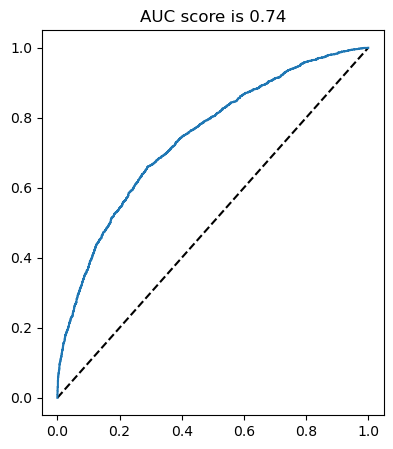

In [173]:
X, y = df.loc[:, ['average_rank', 'rank_difference', 'point_difference']], df['is_won']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.2, random_state=42)

logreg = linear_model.LogisticRegression (C=1e-5)
features = PolynomialFeatures (degree=2)

model = Pipeline([
       ('polynomial features', features),
       ('logistic regression', logreg)])

model = model.fit(X_train, y_train)

fpr, tpr, _ = roc_curve (y_test, model.predict_proba(X_test)[:,1])
plt.figure(figsize=(15,5))
ax = plt.subplot(1,3,1)
ax.plot([0,1], [0,1], 'k--')
ax.plot(fpr, tpr)

ax.set_title('AUC score is {0:0.2}'.format(roc_auc_score (y_test, model.predict_proba (X_test) [:,1])))

In [174]:
player_data = pd.read_csv('FIFA22_official_player_data.csv')
player_data.head()


team_data = pd.read_csv('FIFA - 2022.csv')
team_data.head()



# In[6]:


player_data['Nationality'].unique()


# In[7]:


l1 = team_data['Team'].tolist()



# In[8]:


player_data = player_data.replace('United States','USA')
player_data = player_data.replace('Korea Republic','South Korea')


# In[9]:


player_data['Nationality'].unique()


# In[10]:


player_data_1 = player_data[player_data['Nationality'].isin(l1)]


# In[11]:


player_data_1['Nationality'].unique()


# In[13]:


l2 = player_data_1['Nationality'].tolist()


# In[14]:


team_data['Team'].nunique()


# In[15]:


player_data_1['Nationality'].nunique()


# In[16]:


for i in l1:
    if i not in l2:
        print(i)


# In[17]:


team_data[team_data['Team'] == 'USA']


# In[18]:


player_data[player_data['Nationality'] == 'South Korea']


# In[19]:


Team_Score = pd.DataFrame(columns=['Team_Name','Win_Loss_perc','Player_Score','Net_Score'])


# In[20]:


def Player_Score(team):
    data = player_data_1[player_data_1['Nationality']==team]
    data = data.loc[:,'Crossing':'DefensiveAwareness'].select_dtypes(exclude = 'object')
    score = 0
    for index, row in data.iterrows():
        player_score = row.sum()
        score = score + (player_score/3400)
    score = score / data.shape[0]
    return round(score * 100,2)

for index ,row in team_data.iterrows():
    wl = final_df[final_df['Team'] == row['Team']]['Net Win %'].values
    ps = Player_Score(row['Team'])
    net_score = (wl + ps)/2
    new_entry = {'Team_Name':row['Team'],'Win_Loss_perc':wl,'Player_Score':ps,'Net_Score':net_score}
    Team_Score.loc[index] = new_entry
Team_Score

,Team_Name,Win_Loss_perc,Player_Score,Net_Score
0,Argentina,[63.64],54.75,[59.195]
1,France,[63.885],52.97,[58.427499999999995]
2,Croatia,[56.745000000000005],52.72,[54.7325]
3,Morocco,[58.285],55.50,[56.8925]
4,England,[61.3],50.28,[55.79]
5,Netherlands,[60.55],52.77,[56.66]
6,Portugal,[62.89],54.59,[58.74]
7,Brazil,[73.6],55.55,[64.57499999999999]
8,Japan,[54.205],52.40,[53.302499999999995]
9,Senegal,[56.665],52.92,[54.792500000000004]


In [175]:
Team_Score = Team_Score.sort_values(by = 'Net_Score',ascending = False)


Team_Score.head(10)

,Team_Name,Win_Loss_perc,Player_Score,Net_Score
7,Brazil,[73.6],55.55,[64.57499999999999]
13,Spain,[73.10499999999999],53.76,[63.43249999999999]
25,Iran,[64.46],54.10,[59.28]
0,Argentina,[63.64],54.75,[59.195]
6,Portugal,[62.89],54.59,[58.74]
1,France,[63.885],52.97,[58.427499999999995]
3,Morocco,[58.285],55.50,[56.8925]
5,Netherlands,[60.55],52.77,[56.66]
16,Germany,[62.504999999999995],50.61,[56.5575]
4,England,[61.3],50.28,[55.79]


In [176]:
nested_python_list = [sub_array.tolist() for sub_array in Team_Score['Net_Score']]

In [177]:
new_list_2 = []
for index ,row in Team_Score.iterrows():
    new_list_2 += [row['Team_Name']]
new_list_2

['Brazil',
 'Spain',
 'Iran',
 'Argentina',
 'Portugal',
 'France',
 'Morocco',
 'Netherlands',
 'Germany',
 'England',
 'Belgium',
 'Australia',
 'Senegal',
 'Croatia',
 'Tunisia',
 'Mexico',
 'USA',
 'Ghana',
 'Uruguay',
 'Japan',
 'Saudi Arabia',
 'Denmark',
 'Cameroon',
 'South Korea',
 'Serbia',
 'Costa Rica',
 'Switzerland',
 'Qatar',
 'Ecuador',
 'Poland',
 'Canada',
 'Wales']

In [178]:
nested_python_list

[[64.57499999999999],
 [63.43249999999999],
 [59.28],
 [59.195],
 [58.74],
 [58.427499999999995],
 [56.8925],
 [56.66],
 [56.5575],
 [55.79],
 [54.9875],
 [54.839999999999996],
 [54.792500000000004],
 [54.7325],
 [54.4375],
 [54.24],
 [53.394999999999996],
 [53.3575],
 [53.32],
 [53.302499999999995],
 [53.08],
 [52.989999999999995],
 [52.5925],
 [52.182500000000005],
 [50.917500000000004],
 [50.3975],
 [50.3625],
 [50.285],
 [49.66],
 [49.480000000000004],
 [47.2375],
 [44.8825]]

In [179]:
new_list = []
for i in nested_python_list:
    new_list=new_list+i
new_list

[64.57499999999999,
 63.43249999999999,
 59.28,
 59.195,
 58.74,
 58.427499999999995,
 56.8925,
 56.66,
 56.5575,
 55.79,
 54.9875,
 54.839999999999996,
 54.792500000000004,
 54.7325,
 54.4375,
 54.24,
 53.394999999999996,
 53.3575,
 53.32,
 53.302499999999995,
 53.08,
 52.989999999999995,
 52.5925,
 52.182500000000005,
 50.917500000000004,
 50.3975,
 50.3625,
 50.285,
 49.66,
 49.480000000000004,
 47.2375,
 44.8825]

In [180]:
i=0
for index,row in Team_Score.iterrows():
    row['Net_Score'] = new_list[i]
    i+=1

Text(0.5, 1.0, 'top 10 teams with highest winning %')

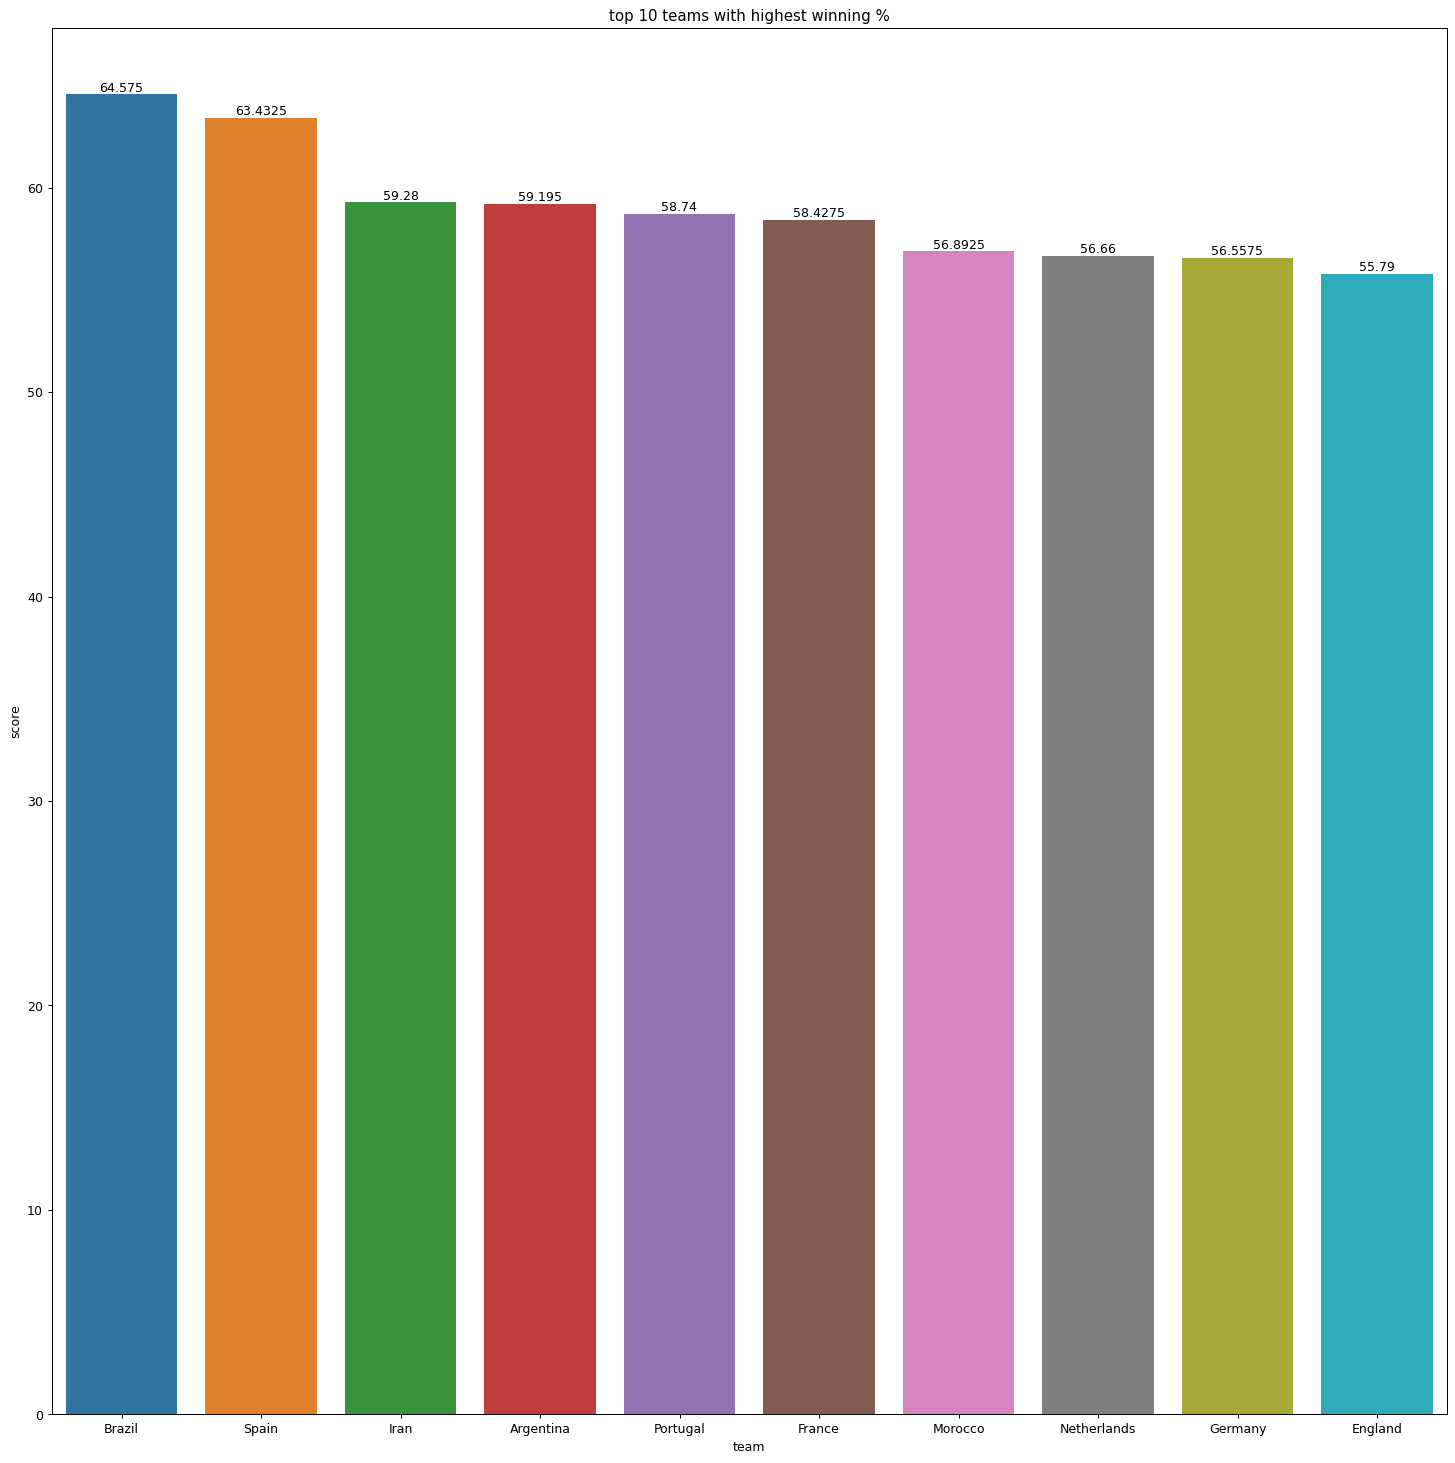

In [181]:
plt.figure(figsize=(20,20),dpi=90)
ax=sns.barplot(x=new_list_2[:10],y=new_list[:10])
ax.bar_label(ax.containers[0])
plt.xlabel('team')
plt.ylabel('score')
plt.title("top 10 teams with highest winning %")

In [182]:
print('The team winning is',new_list_2[0])

The team winning is Brazil
